<a href="https://colab.research.google.com/github/Nouman-wisal/pytorch/blob/main/02_pytorch_Neural_Network_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Network Classification model
classification is predicting whether something is one thing or another(there can be multiple things as options)

#1. Make classification data and get it ready

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.datasets import make_circles

X ,y =make_circles(n_samples=1000, noise=0.03, random_state=42)
print(X[:5])
print(y[:5],"\n")

len(X),X.shape , len(y),y.shape


[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
[1 1 1 1 0] 



(1000, (1000, 2), 1000, (1000,))

In [ ]:


# convert it to data frame
df=pd.DataFrame({
    'X1': X[:,0],
    'X2': X[:,1],
    'label':y
})

print(df.head(5))
df["label"].value_counts() # meaning out 1000 features 500 has label=0 and 500 has label=1,they both have different colors

         X1        X2  label
0  0.754246  0.231481      1
1 -0.756159  0.153259      1
2 -0.815392  0.173282      1
3 -0.393731  0.692883      1
4  0.442208 -0.896723      0


,count
label,
1,500
0,500


#Visualizing the data through plotting
##Plotting the make circle toy data

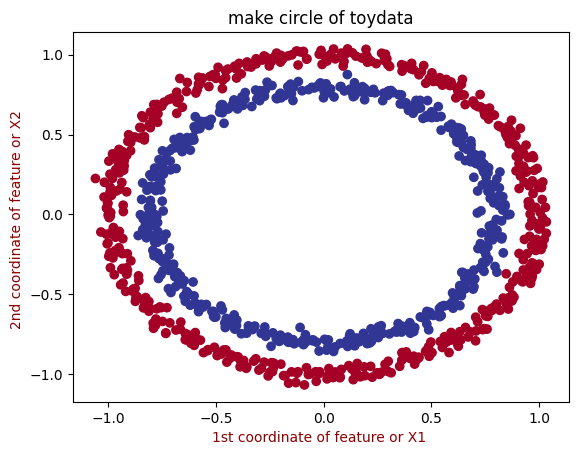

In [ ]:


plt.scatter(X[:,0], X[:,1], c=y , cmap=plt.cm.RdYlBu)
plt.xlabel("1st coordinate of feature or X1 ",c="#8B0000")
plt.ylabel("2nd coordinate of feature or X2 ",c="#8B0000")
plt.title("make circle of toydata")

plt.show()


#Toy data comes in numpy format
###converting it to tensors before splitting for trainig and testing

In [ ]:

print(type(X), X.dtype, type(y), y.dtype,"\n")

# converting X, y to tensors and changing dtype
X=torch.from_numpy(X).type(torch.float32)
y=torch.from_numpy(y).type(torch.float)

print(type(X), X.dtype, type(y), y.dtype)

<class 'numpy.ndarray'> float64 <class 'numpy.ndarray'> int64 

<class 'torch.Tensor'> torch.float32 <class 'torch.Tensor'> torch.float32


#Splitting data for Trainig and Testing

In [ ]:
from sklearn.model_selection import train_test_split

x_train , x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(x_train), len(x_test), len(y_train), len(y_test), x_train.shape

(800, 200, 800, 200, torch.Size([800, 2]))

#Building a Model for binary classification


1.   setup device agnostic code
1.   build model subclass from nn.Module
2.   setup loss and optimizer
2.   train and test model



In [ ]:
device= 'cuda' if torch.cuda.is_available else 'cpu'
device , torch.__version__

('cuda', '2.6.0+cu124')

In [ ]:
"""A simple neural network model for binary classification of circular data."""
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    """Initializes the model with two linear layers."""
    self.layer1 = nn.Linear(in_features=2, out_features=5)  # 1 hidden layer with 5 neurons
    self.layer2 = nn.Linear(in_features=5, out_features=1)  # the Output layer for binary classification


  def forward(self, x:torch.Tensor) -> torch.Tensor:
    """
    Performs a forward pass through the model.

    Args:
        x: The input tensor.

    Returns:
        The output tensor after passing through the linear layers.
    """
    return self.layer2(self.layer1(x))


In [ ]:
model_0= CircleModelV0().to(device)
model_0
# model_0.state_dict()


CircleModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

#The othe way to create this model.
this is for only simple models like ours

In [ ]:
model_0= nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0
# model_0.state_dict()

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

#Setting up Loss_fn & Optimizer & Accuracy Calculator

In [ ]:
# Setting up the loss function & Optimizer & Accuracy Calculator
# lossfn = BCELoss() requires the input to have already gone through activation function prior to input to BECLoss()

loss_fn = nn.BCEWithLogitsLoss() # comes with BUilt_in sigmoid activation function and better numrical calculation  --> recommened

optimizer= torch.optim.Adam(params=model_0.parameters(),
                            lr= 0.1)

def accuracy_fn(y_true, y_pred):
  correct= torch.eq(y_true, y_pred).sum().item()
  acc= (correct / len(y_pred)) *100
  return acc

###Fyi test: our model outputs ***raw logits*** as preds, we have to turn them to ***prediction probabilities*** and then to ***prediction labels***

*   from **Raw Logits**  --->  **prediction probabilities`through sigmoid activation func`**  --->  **prediction labels(y_preds)`by rounding`**




In [ ]:
# this is just fyi to be ussed after trainig

model_0.eval()

with torch.inference_mode():
  y_logits= model_0(x_test.to(device))

y_pred_prob= torch.sigmoid(y_logits) #.round()

y_predss= torch.round(y_pred_prob)
# y_predss.squeeze()

print(y_predss[:5],"\n")
                              #OR

  # In full 1 step (logits -> pred probs -> pred labels)
with torch.inference_mode():
  y_predss_1= torch.round(torch.sigmoid(model_0(x_test.to(device))))

print(y_predss_1[:5],"\n")

# comparing &check which of them are equal to each other
print(torch.eq(y_predss, y_predss_1)[:5].squeeze())


tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0') 

tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0') 

tensor([True, True, True, True, True], device='cuda:0')
